In [10]:
import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import plot as plt
from scipy.signal import convolve
import time as t
from scipy.io.wavfile import read
#from tqdm.notebook import tqdm

In [11]:
"""
Question 1: Time Domain Convolution: [30]

Write a python function y = myTimeConv(x,h) that computes the sample by sample time domain convolution of two signals.
'x' and 'h' are the signal and impulse response respectively and must be NumPy arrays. 
'y' is the convolution output and also must be a NumPy array (single channel signals only). [15] 

If the length of 'x' is 200 and the length of 'h' is 100, what is the length of 'y' ? 
It is sufficient to only provide the answer in a comment above the convolution implementation.  [5]
"""

# If the length of x is 200 and the length of h is 100, the length of y is 299

def myTimeConv(x,h):
    len_x = len(x)
    len_h = len(h)
    len_y= len_x+len_h-1
    
    x=np.pad(x,(0,len_y-len_x))
    h=np.pad(h,(0,len_y-len_x))
        
    y=np.zeros(len_y,dtype=float)
    for n in range(len_y):#tqdm(range(len_y)):
        for m in range(len_h):
            y[n] += x[n - m] * h[m]
    return y      

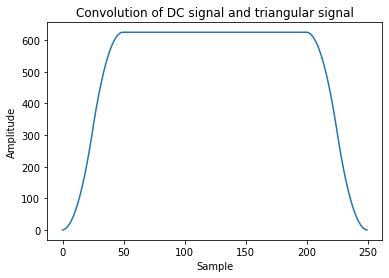

In [14]:
"""
Q1 continued...

In your main script define 'x' as a DC signal of length 200 (constant amplitude of 1) and 'h' as a 
symmetric triangular signal of length 51 (0 at the first and last sample and 1 in the middle). 
Add a function call to myTimeConv() in your script to compute 'y_time' as the time-domain convolution 
of 'x' and 'h' as defined above. Plot the result (label the axes appropriately) and save in the results folder [10]
"""

x = np.ones(200)
h = np.concatenate((np.linspace(0,25,num=26),np.linspace(24,0,num=25)))
y_time = myTimeConv(x,h)
plt(y_time)
pyplot.title('Convolution of DC signal and triangular signal')
pyplot.xlabel('Sample')
pyplot.ylabel('Amplitude')
pyplot.savefig('results/01-convolution.png')

In [13]:
"""
Question 2. Compare with SciPy Implementation: [20]

In this part, you will compare your implementation with the built-in SciPy convolve() 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) method. 

Write a function (m, mabs, stdev, time) = CompareConv(x, h) that compares the output of the 
convolution from both myTimeConv() with the built-in SciPy convolve() function. 
Again, 'x' and 'h' are the signal and impulse response respectively and must be NumPy arrays. 
The function should compute the convolution result of myTimeConv() and compare it with that of convolve(). 
It must return the following parameters: [10]

a) m: float of the mean difference of the output compared to convolve()
b) mabs: float of the mean absolute difference of the output compared to convolve()
c) stdev: float standard deviation of the difference of the output compared to convolve() 
d) time: 2-lengthed array containing the running time of each method. 
(reminder: you will not be graded on speed results)
"""

def CompareConv(x,h):
    start = t.time()
    y1 = myTimeConv(x,h)
    end1 = (t.time()-start)
    
    start = t.time()
    y2 = convolve(x,h)
    end2 = (t.time()-start)
    m = np.mean(y1-y2)
    mabs = np.mean(np.abs(y1-y2))
    stdev = np.std(y1-y2)
    time=np.zeros(2)
    time[0]=end1
    time[1]=end2 
    
    return m, mabs, stdev, time

In [5]:
"""
Using the files piano.wav and impulse-response.wav add a function call to CompareConv() method in 
your main script and report the output in the results folder. [10]
"""

_,piano=read("audio/piano.wav")
_,ir=read("audio/impulse-response.wav")
m, mabs, stdev, time = CompareConv(piano.astype(int),ir.astype(int))

  0%|          | 0/173695 [00:00<?, ?it/s]

(0.0, 0.0, 0.0, array([4.58076167e+02, 1.64086819e-02]))

In [9]:
with open('results/02-CompareConv.txt', 'w') as f:
    f.write('m: %s\n' % m)
    f.write('mabs :%s\n' % mabs)
    f.write('stdev: %s\n' % stdev)
    f.write('time: %s\n ' % time)